1. Reference: Feature detection

1.1 Harris Corner Detector in OpenCV

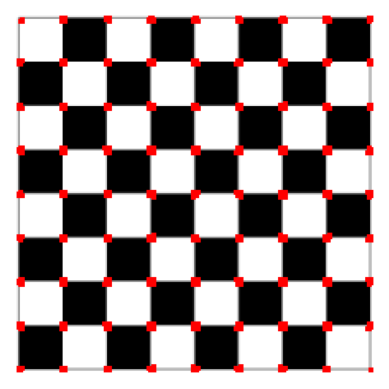

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

filename = 'chess.png'
img = cv.imread(filename)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray, 2, 3, 0.04)

dst = cv.dilate(dst, None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst > 0.01 * dst.max()] = [0, 0, 255]

# Convert the image to RGB for displaying with matplotlib
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Display
plt.imshow(img_rgb)
plt.axis('off')  # Hide the axes
plt.show()


1.2 SIFT (Scale-Invariant Feature Transform)

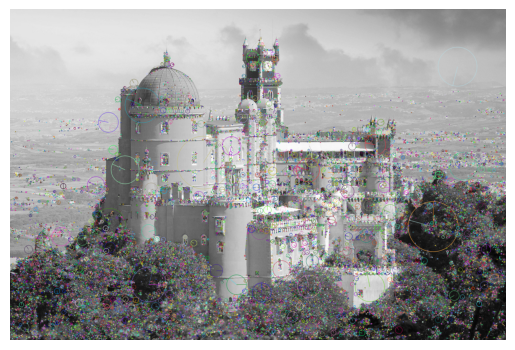

In [4]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

filename = '/content/laudai.png'
img = cv.imread(filename)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
sift = cv.SIFT_create()
kp = sift.detect(gray, None)

img_with_keypoints = cv.drawKeypoints(gray, kp, img)

img = cv.drawKeypoints(gray, kp, img, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv.imwrite('/content/sift_laudai.jpg', img)
# Display the image with SIFT keypoints
img_rgb = cv.cvtColor(img_with_keypoints, cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')  # Hide the axes
plt.show()


1.3 FAST Algorithm for Corner Detection

Threshold: 10
nonmaxSuppression: True
neighborhood: 2
Total Keypoints with nonmaxSuppression: 567
Total Keypoints without nonmaxSuppression: 1952


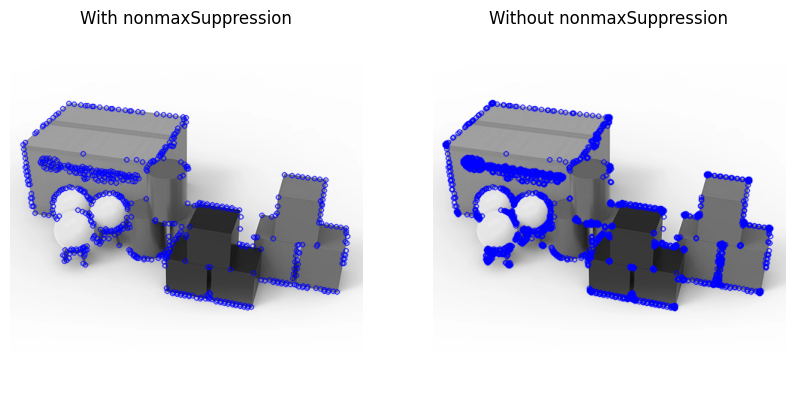

In [7]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# Read the image
img = cv.imread('khoi.png', cv.IMREAD_GRAYSCALE)

# Initiate FAST object with default values
fast = cv.FastFeatureDetector_create()

# Find and draw the keypoints
kp = fast.detect(img, None)
img_with_keypoints_true = cv.drawKeypoints(img, kp, None, color=(255,0,0))

# Print all default params
print("Threshold: {}".format(fast.getThreshold()))
print("nonmaxSuppression: {}".format(fast.getNonmaxSuppression()))
print("neighborhood: {}".format(fast.getType()))
print("Total Keypoints with nonmaxSuppression: {}".format(len(kp)))

# Disable nonmaxSuppression
fast.setNonmaxSuppression(0)
kp = fast.detect(img, None)
print("Total Keypoints without nonmaxSuppression: {}".format(len(kp)))
img_with_keypoints_false = cv.drawKeypoints(img, kp, None, color=(255,0,0))

# Convert images to RGB for displaying with matplotlib
img_with_keypoints_true_rgb = cv.cvtColor(img_with_keypoints_true, cv.COLOR_BGR2RGB)
img_with_keypoints_false_rgb = cv.cvtColor(img_with_keypoints_false, cv.COLOR_BGR2RGB)

# Display the images with keypoints
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_with_keypoints_true_rgb)
plt.title('With nonmaxSuppression')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_with_keypoints_false_rgb)
plt.title('Without nonmaxSuppression')
plt.axis('off')

plt.show()


1.4 Feature Matching + Homography to find Objects

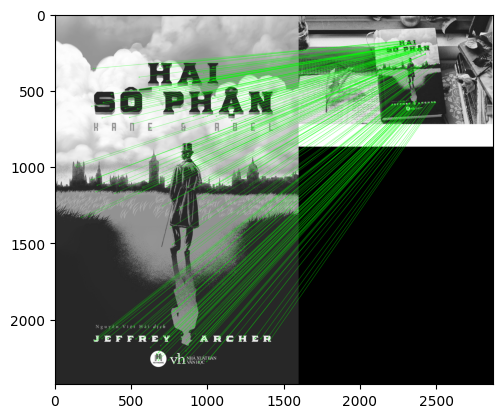

In [8]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

MIN_MATCH_COUNT = 10

# Read the query image and train image
img1 = cv.imread('book.png', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('bookmau.png', cv.IMREAD_GRAYSCALE)

# Initiate SIFT detector
sift = cv.SIFT_create()

# Find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv.FlannBasedMatcher(index_params, search_params)

# Match descriptors using FLANN
matches = flann.knnMatch(des1, des2, k=2)

# Apply Lowe's ratio test to filter good matches
good = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good.append(m)

# Check if enough matches are found
if len(good) > MIN_MATCH_COUNT:
    src_pts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)
    M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC, 5.0)
    matchesMask = mask.ravel().tolist()
    draw_params = dict(matchColor=(0, 255, 0),  # draw matches in green color
                       singlePointColor=None,
                       matchesMask=matchesMask,  # draw only inliers
                       flags=2)
    img3 = cv.drawMatches(img1, kp1, img2, kp2, good, None, **draw_params)
    plt.imshow(img3, 'gray')
    plt.show()
else:
    print("Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT))


2 Reference: Edge detection

2.1 Canny Edge Detection

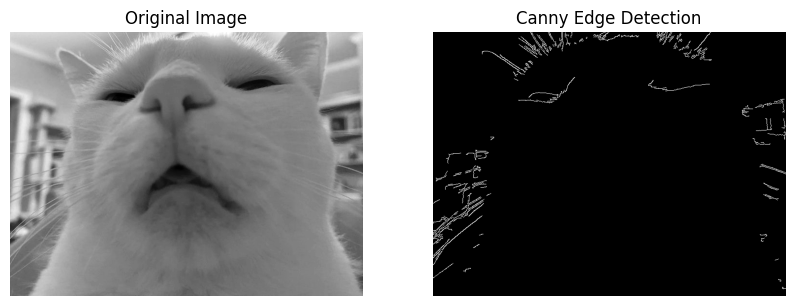

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
filename = 'meo.png'
img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

# Apply Canny edge detection
edges = cv2.Canny(img, 100, 200)

# Display the original and Canny edge detection images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

plt.show()


Roberts, Sobel and Prewitt Detection

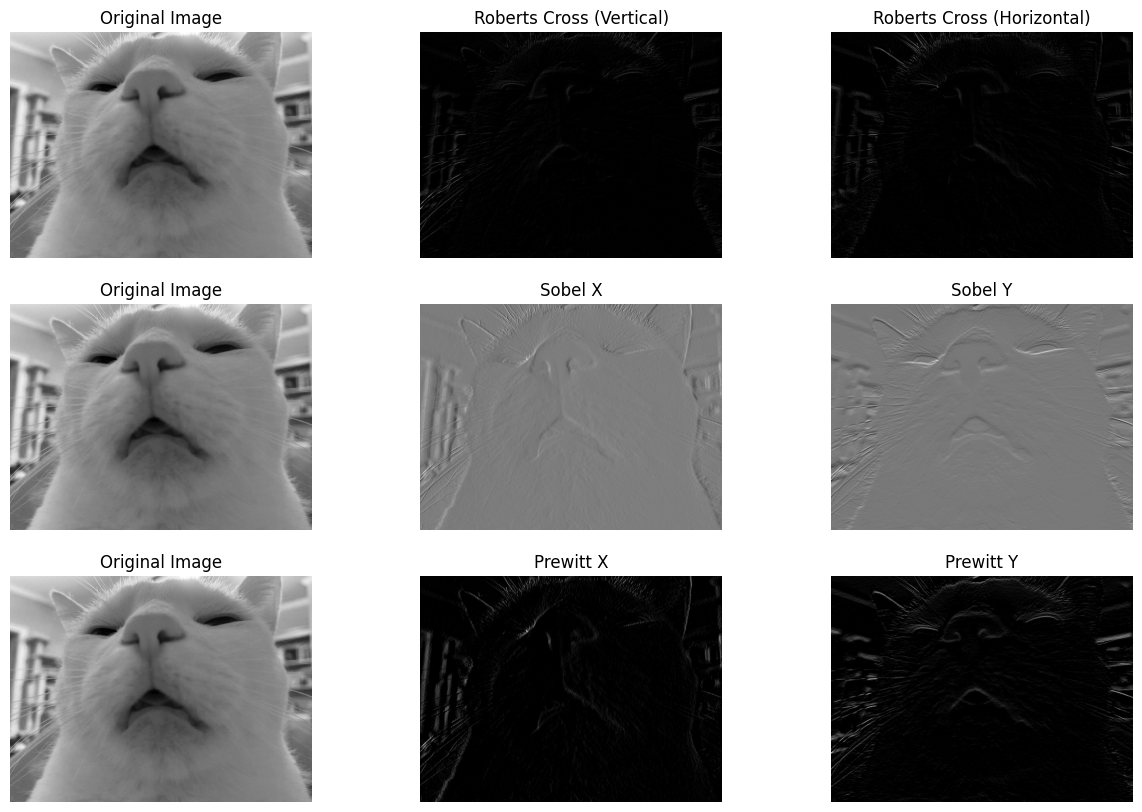

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
filename = 'meo.png'
img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

# Roberts Cross Operator
roberts_cross_v = np.array([[ 0, 0, 0 ],
                             [ 0, 1, 0 ],
                             [ 0, 0,-1 ]])
roberts_cross_h = np.array([[ 0, 0, 0 ],
                             [ 0, 0, 1 ],
                             [ 0,-1, 0 ]])

roberts_cross_v_edges = cv2.filter2D(img, -1, roberts_cross_v)
roberts_cross_h_edges = cv2.filter2D(img, -1, roberts_cross_h)

# Sobel Operator
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

# Prewitt Operator
prewitt_x = np.array([[-1, 0, 1],
                      [-1, 0, 1],
                      [-1, 0, 1]])
prewitt_y = np.array([[ 1, 1, 1],
                      [ 0, 0, 0],
                      [-1,-1,-1]])

prewitt_x_edges = cv2.filter2D(img, -1, prewitt_x)
prewitt_y_edges = cv2.filter2D(img, -1, prewitt_y)

# Display the results
plt.figure(figsize=(15, 10))

plt.subplot(3, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(3, 3, 2)
plt.imshow(roberts_cross_v_edges, cmap='gray')
plt.title('Roberts Cross (Vertical)')
plt.axis('off')

plt.subplot(3, 3, 3)
plt.imshow(roberts_cross_h_edges, cmap='gray')
plt.title('Roberts Cross (Horizontal)')
plt.axis('off')

plt.subplot(3, 3, 4)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(3, 3, 5)
plt.imshow(sobel_x, cmap='gray')
plt.title('Sobel X')
plt.axis('off')

plt.subplot(3, 3, 6)
plt.imshow(sobel_y, cmap='gray')
plt.title('Sobel Y')
plt.axis('off')

plt.subplot(3, 3, 7)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(3, 3, 8)
plt.imshow(prewitt_x_edges, cmap='gray')
plt.title('Prewitt X')
plt.axis('off')

plt.subplot(3, 3, 9)
plt.imshow(prewitt_y_edges, cmap='gray')
plt.title('Prewitt Y')
plt.axis('off')

plt.show()
